#Loading the Keyword Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Calling libraries
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#Creating dataframes
df = pd.read_csv("/content/drive/MyDrive/Ro'ya CV4Africa Community Files/Bibliometric Study/Work_Phases/Data_Analysis/keywords.csv", sep=";")
#df = pd.read_csv("keywords.csv", sep=";")
df = df[df["Keyword"]!="-"]
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(187812, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187812 entries, 0 to 188494
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Keyword              187812 non-null  object 
 1   EID                  187812 non-null  object 
 2   Year                 187812 non-null  float64
 3   Highly Cited         187812 non-null  bool   
 4   Northern Africa      187812 non-null  bool   
 5   Southern Africa      187812 non-null  bool   
 6   Eastern Africa       187812 non-null  bool   
 7   Western Africa       187812 non-null  bool   
 8   Central Africa       187812 non-null  bool   
 9   OA                   187812 non-null  bool   
 10  Journal Publication  187812 non-null  bool   
dtypes: bool(8), float64(1), object(2)
memory usage: 7.2+ MB


#Most common keywords

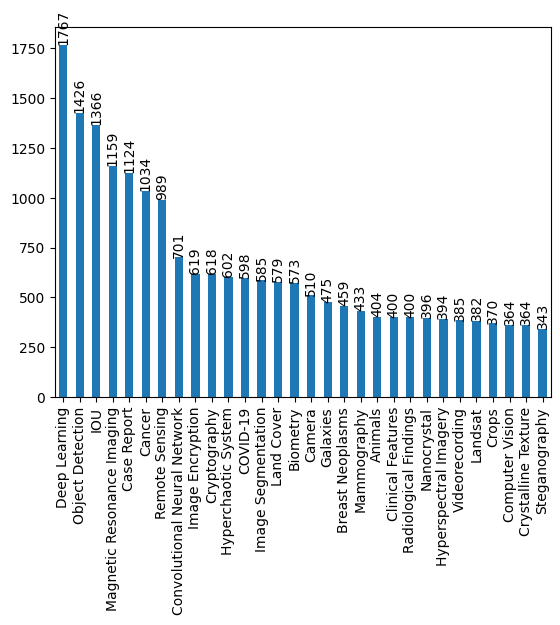

In [ ]:
nkeywords = 30
fig1 = df["Keyword"].value_counts()[0:nkeywords].plot(kind='bar');
fig1.bar_label(fig1.containers[0], label_type='edge', rotation='vertical');

#Keyword mentions and condition

In [ ]:
best = df["Keyword"].value_counts()[0:nkeywords].index.tolist()
best.reverse()

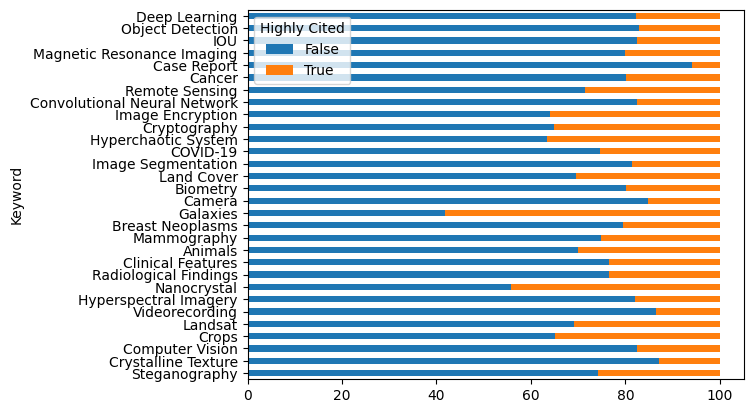

In [ ]:
df.groupby(['Keyword'])['Highly Cited'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);

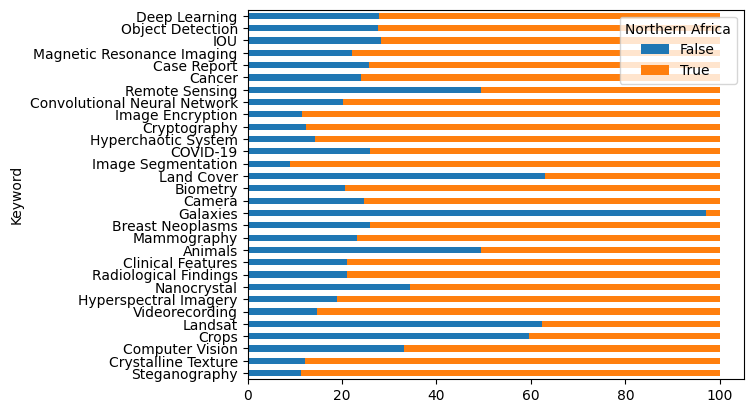

In [ ]:
df.groupby(['Keyword'])['Northern Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);

df.groupby(['Keyword'])['Northern Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).to_csv('NA_keys.csv')

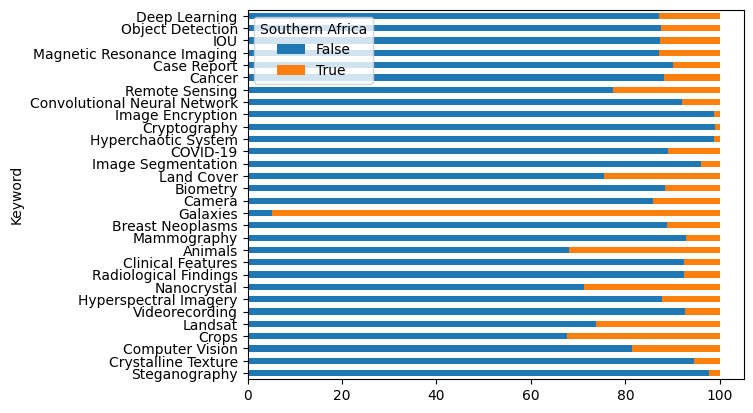

In [ ]:
df.groupby(['Keyword'])['Southern Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
df.groupby(['Keyword'])['Southern Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).to_csv("SA_keys.csv")

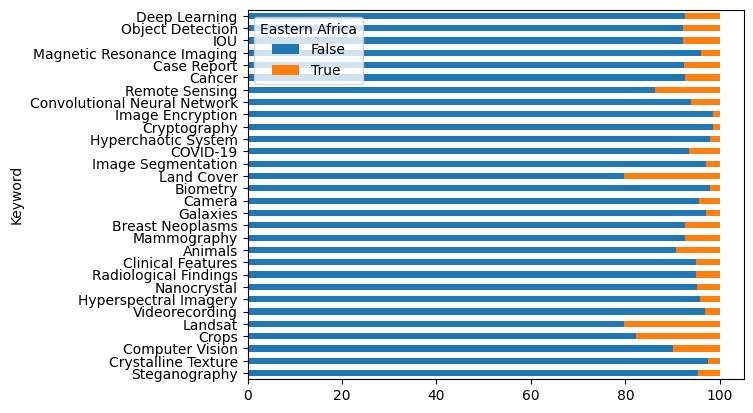

In [ ]:
df.groupby(['Keyword'])['Eastern Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
df.groupby(['Keyword'])['Eastern Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).to_csv("EA_keys.csv")

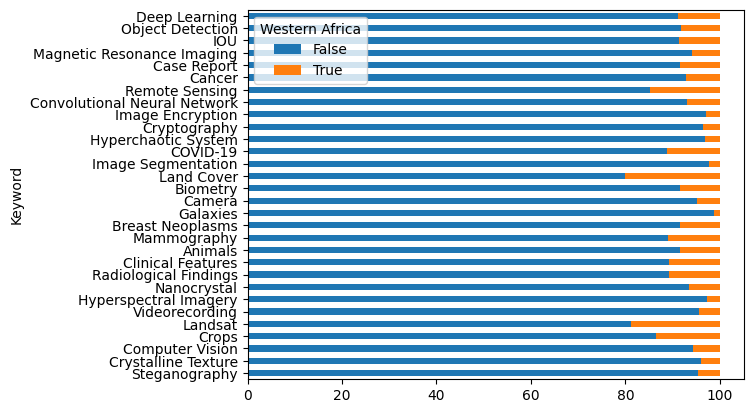

In [ ]:
df.groupby(['Keyword'])['Western Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
df.groupby(['Keyword'])['Western Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).to_csv("WA_keys.csv")

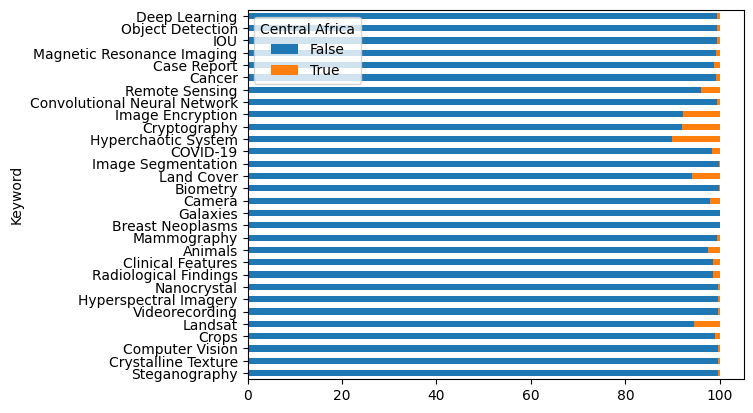

In [ ]:
df.groupby(['Keyword'])['Central Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
df.groupby(['Keyword'])['Central Africa'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).to_csv("CA_keys.csv")

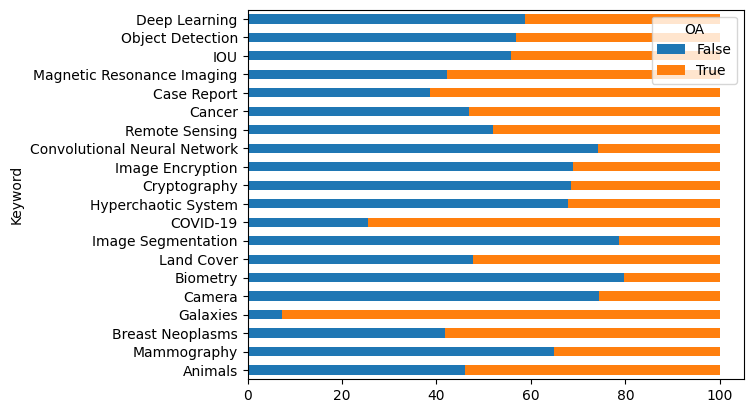

In [ ]:
df.groupby(['Keyword'])['OA'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);

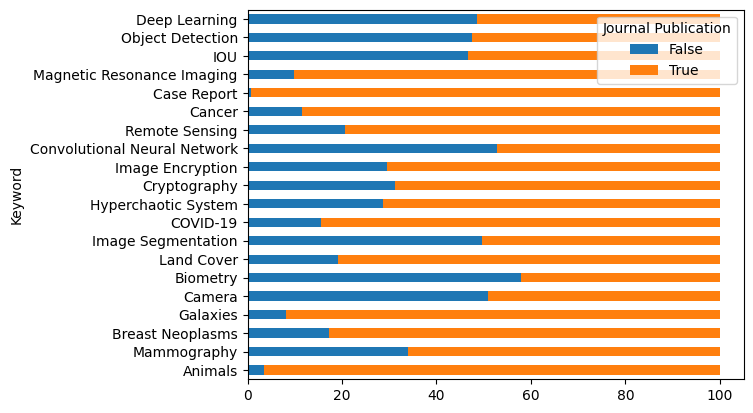

In [ ]:
df.groupby(['Keyword'])['Journal Publication'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);

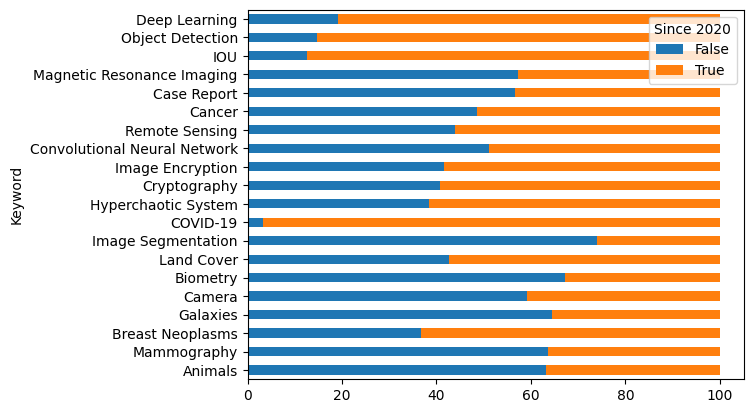

In [ ]:
df["Since 2020"] = df["Year"] >= 2020
df.groupby(['Keyword'])['Since 2020'].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);

#Co-occurrence Analysis

In [ ]:
keywords = list(df["Keyword"].value_counts()[0:nkeywords].index)
keywords1 = list(np.repeat(keywords, len(keywords)))
keywords2 = keywords * len(keywords)
dfmatrix = pd.DataFrame(columns = ["Keyword 1", "Keyword 2", "Count"])
dfmatrix["Keyword 1"] = keywords1
dfmatrix["Keyword 2"] = keywords2
dfmatrix = dfmatrix[dfmatrix["Keyword 1"] > dfmatrix["Keyword 2"]]
dfmatrix["Association"] = dfmatrix["Keyword 1"]+" / "+dfmatrix["Keyword 2"]
def count_associations(association):
  print(association)
  association_parts = association.split(" / ")
  return sum([list(df[df["Keyword"] == association_parts[0]]["EID"]).count(x) for x in list(df[df["Keyword"] == association_parts[1]]["EID"])])


dfmatrix["Count"] = dfmatrix["Association"].apply(count_associations)
dfmatrix

Deep Learning / Case Report
Deep Learning / Cancer
Deep Learning / Convolutional Neural Network
Deep Learning / Cryptography
Deep Learning / COVID-19
Deep Learning / Biometry
Deep Learning / Camera
Deep Learning / Breast Neoplasms
Deep Learning / Animals
Deep Learning / Clinical Features
Deep Learning / Crops
Deep Learning / Computer Vision
Deep Learning / Crystalline Texture
Object Detection / Deep Learning
Object Detection / IOU
Object Detection / Magnetic Resonance Imaging
Object Detection / Case Report
Object Detection / Cancer
Object Detection / Convolutional Neural Network
Object Detection / Image Encryption
Object Detection / Cryptography
Object Detection / Hyperchaotic System
Object Detection / COVID-19
Object Detection / Image Segmentation
Object Detection / Land Cover
Object Detection / Biometry
Object Detection / Camera
Object Detection / Galaxies
Object Detection / Breast Neoplasms
Object Detection / Mammography
Object Detection / Animals
Object Detection / Clinical Feature

,Keyword 1,Keyword 2,Count,Association
4,Deep Learning,Case Report,0,Deep Learning / Case Report
5,Deep Learning,Cancer,0,Deep Learning / Cancer
7,Deep Learning,Convolutional Neural Network,15,Deep Learning / Convolutional Neural Network
9,Deep Learning,Cryptography,0,Deep Learning / Cryptography
11,Deep Learning,COVID-19,0,Deep Learning / COVID-19
...,...,...,...,...
893,Steganography,Hyperspectral Imagery,0,Steganography / Hyperspectral Imagery
895,Steganography,Landsat,0,Steganography / Landsat
896,Steganography,Crops,0,Steganography / Crops
897,Steganography,Computer Vision,0,Steganography / Computer Vision


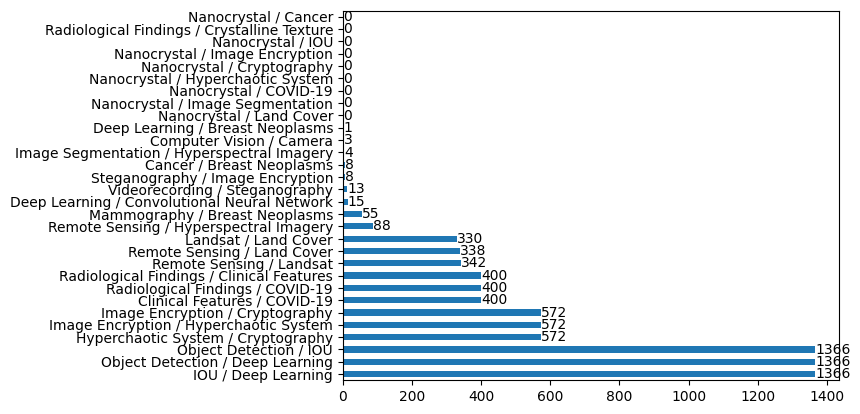

In [ ]:
dfplot = pd.DataFrame(index = list(dfmatrix["Association"]), columns = ["count"])
dfplot["count"] = list(dfmatrix["Count"])
dfplot.sort_values(by="count", inplace=True, ascending=False)
fig = dfplot["count"][0:30].plot(kind = "barh")
fig.bar_label(fig.containers[0], label_type='edge');
dfplot["count"][0:30].to_csv('coocurence.csv')